# Unsupervised Learning

## Principal Component Analysis (PCA)

### Code Is Partly My Own

## Implementation: how is PCA implemented?

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data

In [ ]:
# centering data like shown in marsland
def center_data(A):

    #getting mean of dataset, adjusting values accordingly
    mean = np.mean(A,0)
    A -= mean

    return A

#### Testcase

In [ ]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix

In [ ]:
# computing of matrix as shown in marsland
def compute_covariance_matrix(A):

    # using numpy function to create covariance matrix
    return np.cov(np.transpose(A))

#### Testcase

In [ ]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors

In [ ]:
# computing eigenvalue, eigenvectors as shown in marsland
def compute_eigenvalue_eigenvectors(A):

    #initalizing eigenvalues and eigenvector, assigning data
    eigval, eigvec = None, None
    eigval, eigvec = np.linalg.eig(A)

    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real

    return eigval, eigvec

#### Testcase

In [ ]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors

In [ ]:
# sorting eigenvalue, eigenvector as shown in marsland
def sort_eigenvalue_eigenvectors(eigval, eigvec):

    # creating indices out of sorting indices of array
    indices = np.argsort(eigval)
    indices = indices[::-1]

    # sorting based on created indices
    sorted_eigvec = eigvec[:,indices]
    sorted_eigval = eigval[indices]

    return sorted_eigval, sorted_eigvec

#### Testcase

In [ ]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm

In [ ]:
# pca algorithm as shown in marsland, combining steps from before
def pca(A,m):

    # centering data and computing covariance matrix
    A_cntr = center_data(A)
    covM = compute_covariance_matrix(A_cntr)

    # Compute eigenvalues and sort them
    pca_eigval,pca_eigvec = compute_eigenvalue_eigenvectors(covM)
    pca_eigval, pca_eigvec = sort_eigenvalue_eigenvectors(pca_eigval, pca_eigvec)

    # changing size/dimension accordingly
    pca_eigvec = pca_eigvec[:,:m]

    # producing the new data matrix
    x = A_cntr.dot(pca_eigvec)

    return pca_eigvec, x

#### Testcase

In [ ]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)

test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))

test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

### Comment from the author: ###

I used the functions created above in the pca instead of combining the code into one single one. This way the code overall is way cleaner. All of the code is based on the code shown in Marsland.

## Understanding: how does PCA work?

### Code Is Partly My Own

### Loading the data

In [ ]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data

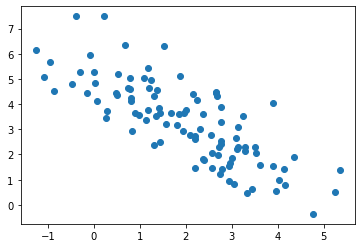

In [ ]:
# plotting data set X
plt.scatter(X[:,0],X[:,1])

### Visualize the centered data

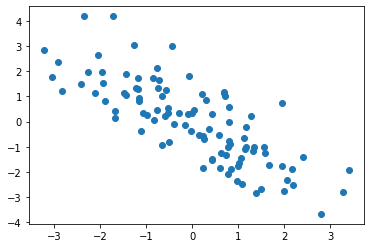

In [ ]:
# centering data with center function defined before, plotting data
X = center_data(X)
plt.scatter(X[:,0],X[:,1])

### Visualize the first eigenvector

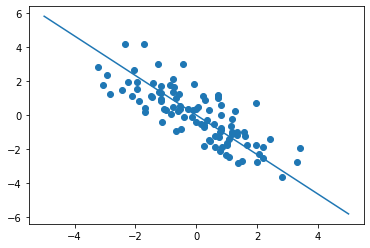

In [ ]:
# getting eigvec with pca function defined before, grabbing first eigvec
pca_eigvec, _ = pca(X, 2)
first_eigvec = pca_eigvec[:,0]

#plotting data
plt.scatter(X[:,0],X[:,1])

#plotting first eigvec
x = np.linspace(-5, 5, 1000)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y)

### Visualize the PCA projection

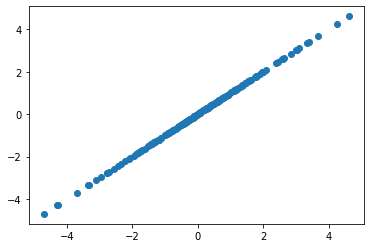

In [ ]:
# getting projection (eigvalues) with pca function, plotting data
_,P = pca(X, 2)
plt.scatter(P,P)

## Commet from the author: ##

The projected values look wrong on first sight, but since all other tests before looked fine this probably also fine. It is noteworthy that that diagonal line goes the other way around compared to the first eigenvector above.

## Evaluation: when are the results of PCA sensible?

### Loading the first set of labels

In [ ]:
X,y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA

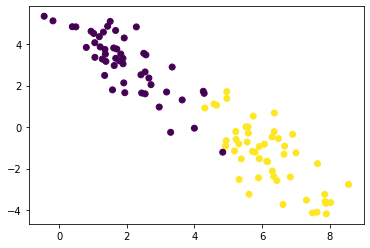

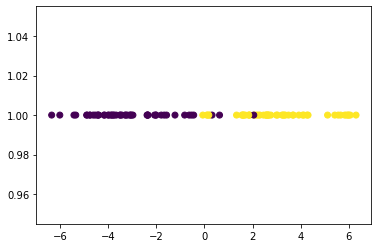

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])

plt.figure()
_,P = pca(X, 2)
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])

### Loading the second set of labels

In [ ]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA

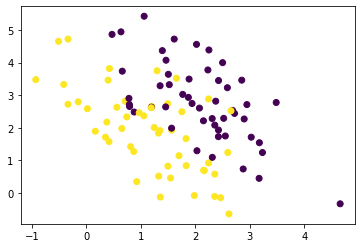

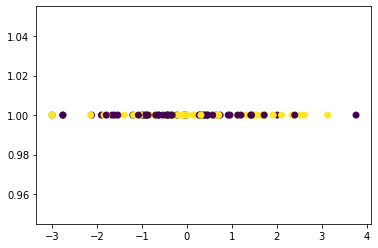

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y[:,0])
_, P = pca(X, 2)

plt.figure()

plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])

## Case study: PCA for visualization

### Loading the data

In [ ]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features

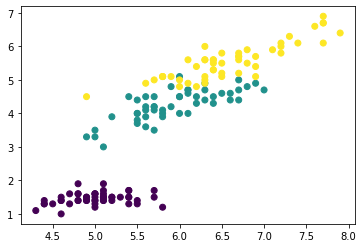

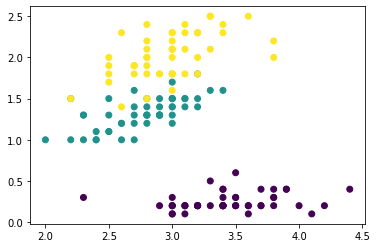

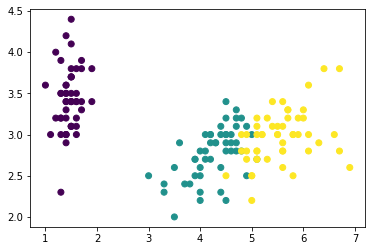

In [ ]:
plt.scatter(X[:,0], X[:,2], c=y)
plt.show()
plt.scatter(X[:,1], X[:,3], c=y)
plt.show()
plt.scatter(X[:,2], X[:,1], c=y)
plt.show()

### Comment by the author: ###

### Visualizing the data by PCA

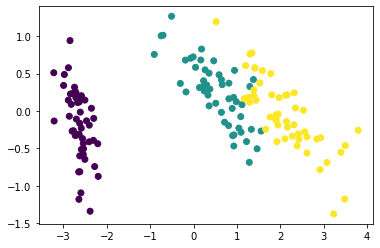

In [ ]:
_,P = pca(X,2)
plt.scatter(P[:,0], P[:,1], c=y)

## Case study 2: PCA for compression

### Loading the data

In [ ]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data

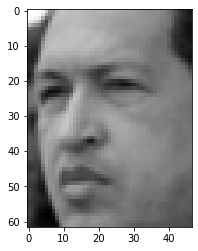

In [ ]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function

In [ ]:
def encode_decode_pca(A,m):

    # centering data and computing covariance matrix
    A_cntr = center_data(A)
    covM = compute_covariance_matrix(A_cntr)

    # Compute eigenvalues and sort them
    pca_eigval,pca_eigvec = compute_eigenvalue_eigenvectors(covM)
    pca_eigval, pca_eigvec = sort_eigenvalue_eigenvectors(pca_eigval, pca_eigvec)

    # changing size/dimension accordingly
    pca_eigvec = pca_eigvec[:,:m]

    # producing the new data matrix
    x = A_cntr.dot(pca_eigvec)

    # reconstructing with uncentered data as shown in marsland
    Ahat = x.dot(pca_eigvec.T) + np.mean(A, axis=0)

    return Ahat

### Compressing and decompressing the data

In [ ]:
# running pca, encode, decode with m=200
Xhat = encode_decode_pca(X,200)

### Inspecting the reconstructed data

Showing original picture (top).
And pca reconstruction with m=200 (bottom).



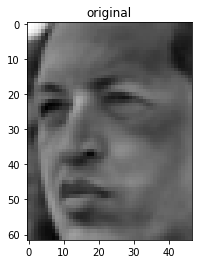

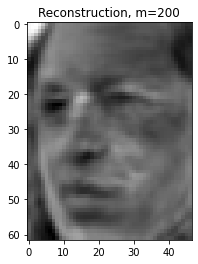

In [ ]:
# plotting original picture
print("Showing original picture (top).\nAnd pca reconstruction with m=200 (bottom).\n")
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.title("original")
plt.show()

# plotting picture reconstructed with m=200
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.title("Reconstruction, m=200")
plt.show()

**Comment:**

### Evaluating different compressions

Showing original picture (top).
And pca reconstruction with various m values (bottom).



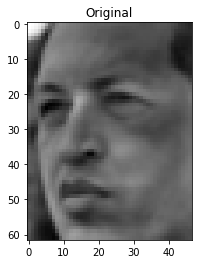

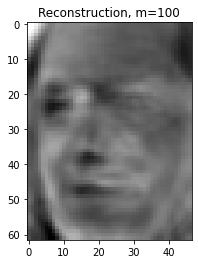

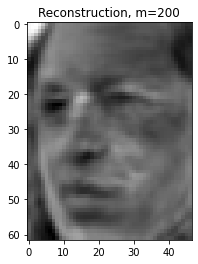

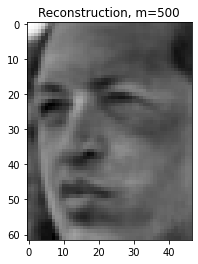

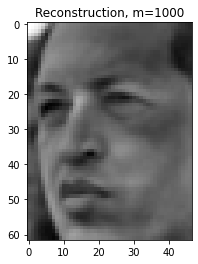

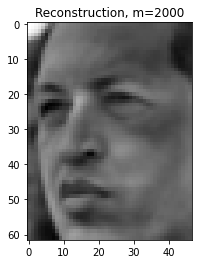

In [ ]:
# ruinning PCA with different dimensions and comparing results
def run_picturePCA(X, dims):

    # plotting original
    print("Showing original picture (top).\nAnd pca reconstruction with various m values (bottom).\n")
    plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
    plt.title("Original")
    plt.show()

    # looping over all dim values given
    for dim in dims:

        #running pca reconstruction with dim value
        Xhat = encode_decode_pca(X, dim)

        # plotting picture reconstructed with selected m value
        plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
        plt.title("Reconstruction, m="+str(dim))
        plt.show()

run_picturePCA(X,dims = [100, 200, 500, 1000, 2000])

# K-Means Clustering

### Importing scikit-learn library

In [ ]:
from sklearn.cluster import KMeans

### Loading the data

In [ ]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA

In [ ]:
_,P = pca(X, 2)

### Running k-means

In [ ]:
# running kmeans with different k values and return all results
def runKMeans(kValues):

    # initalizing array for results
    yhats = []

    # looping over values, running k-means algorithm
    for k in kValues:
        KMean = KMeans(k)
        yhats.append(KMean.fit_predict(P))

    return yhats

### Qualitative assessment

Running and plotting Original kMeans and with values [2, 3, 4, 5, 10].



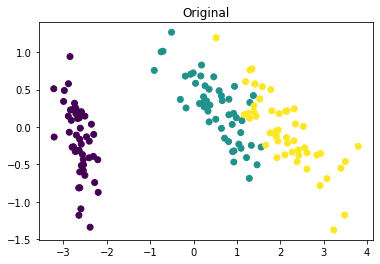

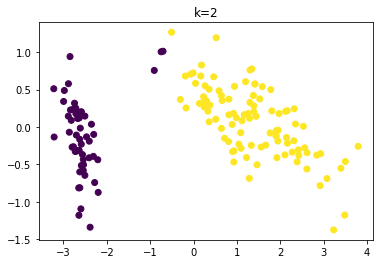

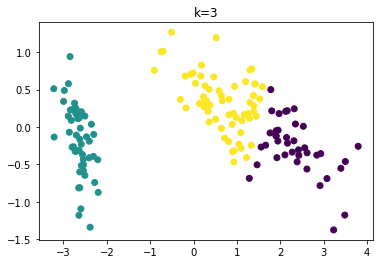

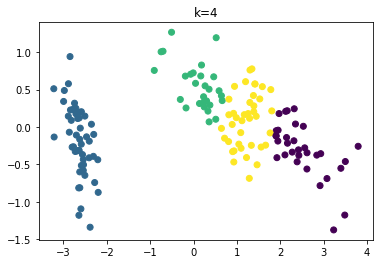

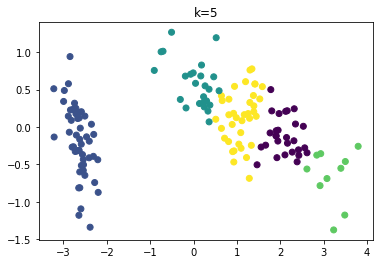

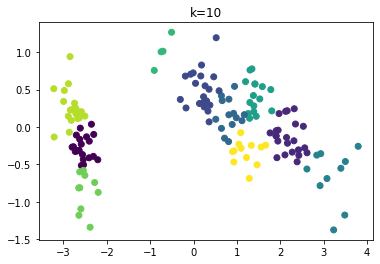

In [ ]:
#qualitative assesment of k-mean algorithm
def assesKmeans(kValues):
    print("Running and plotting Original kMeans and with values "+str(kValues)+".\n")

    # initalizing counter
    counter = 0

    # running KMean with kValues
    yhats = runKMeans(kValues)

    # plotting original data
    plt.scatter(P[:,0],P[:,1],c=y)
    plt.title("Original")
    plt.show()

    # plotting results of each run
    for yhat in yhats:

        # plotting results of run with k value
        plt.scatter(P[:,0],P[:,1],c=yhat)
        plt.title("k="+str(kValues[counter]))
        plt.show()

        # upping counter
        counter += 1


assesKmeans([2,3,4,5,10])

**Comment:**
The distinction of value groups based on the variances is easy to see. Also, as the k value rises, you can see the variance between groups getting lower and values are less indistinguishable (see last one with k=10 as example). It is also clear that the k-means algorithm is always a little bit off (compare especially original at k-value 3).

# Quantitative Assessment of K-Means

### Code Is My Own

In [ ]:
# import plus added pandas import for nicer data tables, thrown out unused metrics of sklearn
from sklearn.linear_model import LogisticRegression
import pandas as pd

X,y = syntheticdata.get_iris_data()

In [ ]:
# running logistic regression with PCA from above
def runLogRegPCA(X,y,m):

    # running pca
    _,P = pca(X, m)

    # initalizing and training normal logistic regresseion
    logReg = LogisticRegression()
    logReg.fit(P,y)

    # printing accuracy of logistic regression compared to pca
    return round(logReg.score(P, y),4)

runLogRegPCA(X, y, 2)

0.9667

In [ ]:
# running Logistic Regression with KMean, variable k values
def runLogRegKMean(k):

    # creating logistic Regression, running KMeans code from before once
    logReg = LogisticRegression()
    yhat = runKMeans([k])[0]

    # encoding x based on k value and KMeans result
    XCoded = []
    for value in yhat:

        #initalizing vector encoding of value
        encoded_value = []

        # adding 0 to vector, changing correct value to 1
        for i in range(k):
            encoded_value.append(0)
        encoded_value[value] = 1

        # saving new encoded value to dataset
        XCoded.append(encoded_value)

    # fitting logistic regression, calculating accuracy
    logReg.fit(XCoded,y)
    score = logReg.score(XCoded,y)

    return score

Accuracy of LogReg with PCA is at 0.9667
Printing graph of accuracy with KMeans below:



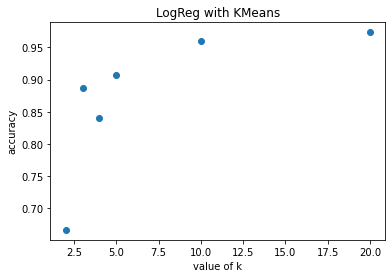

,2,3,4,5,10,20
Accuracy,0.6667,0.8867,0.84,0.9067,0.96,0.9733


In [ ]:
def runAssesment(m, kValues):

    # initalizing result array
    resultPCA = 0
    resultKMean = []

    # running log reg with PCA
    resultPCA = runLogRegPCA(X, y, 2)

    for k in kValues:

        resultKMean.append(round(runLogRegKMean(k), 4))

    print("Accuracy of LogReg with PCA is at "+str(resultPCA))
    print("Printing graph of accuracy with KMeans below:\n")

    # plotting development of accuarcy with higher k values
    plt.scatter(kValues, resultKMean)
    plt.title("LogReg with KMeans")
    plt.xlabel("value of k")
    plt.ylabel("accuracy")
    plt.show()

    # creating table with overview of accuracies, printing
    resultKMean = pd.DataFrame(resultKMean)
    resultKMean.columns=["Accuracy"]
    resultKMean.index=kValues
    display(resultKMean.transpose())

runAssesment(2, [2,3,4,5,10,20])


**Comment:**

The accuracy of logistic regression with KMeans and high values for k can get rather high (up to 97.33%).
Logistic Regression with PCA nevertheless has a high accuracy of 0.9667. Overall a higher k value provides a higher accuracy and both PCA and KMeans can be equal in terms of accuracy.